In [ ]:
Подключим необходимые библиотеки

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread, imsave
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold, gaussian, threshold_otsu
from skimage.measure import label as sk_measure_label
from skimage.measure import regionprops

Функция будет искать все предметы на фото и находить их среди шаблонов моих картинок. 
На примере - поиск изоленты

In [10]:
def things_finder(img):
    
    #поиск изоленты на фото
    mask_path = "data/my_things_masks/2.jpg"
    
    template = cv2.imread(os.path.join(mask_path), 0)
    w, h = template.shape[::-1]
    
    img = img.copy()
    method = eval('cv2.TM_CCOEFF')
    res = cv2.matchTemplate(img,template,method)
    threshold = 0
    res = np.where( res >= threshold, res, 0)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    #многоугольник, описывающий мой предмет
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.imshow(img,cmap = 'gray')
    plt.show()

#Пример использования данной функции
#path = "data/test_input/3.jpg"
#img = cv2.imread(os.path.join(path), 0)
#things_finder(img)

In [ ]:
Основная функция программы

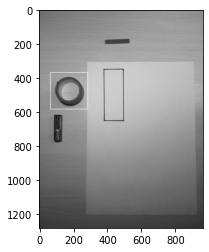

True

In [16]:
def check_image(path):
    #открыть картинку
    img = cv2.imread(os.path.join(path), 0)
    
    #найти на ней предметы, многоугольник
    things_finder(img)
    
    #TO DO:
    #сопоставить предметы с моими для точности
    #попробовать вставить в многоугольник
    return True

#пример использования
check_image("data/test_input/3.jpg")